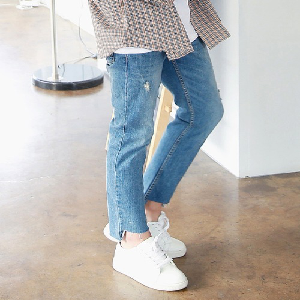

jean


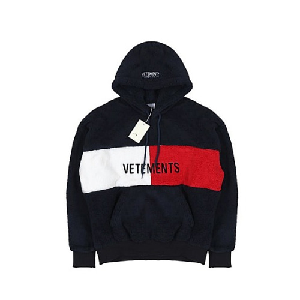

hood


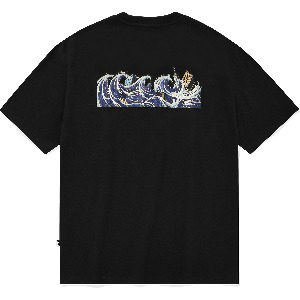

shortT


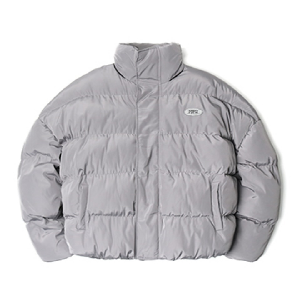

padding


In [7]:
import PIL as pl
import tensorflow.keras
import numpy as np
import os
from IPython.display import display

label = {
    0:'hat', 1:'hood', 2:'jean', 3:'longT', 4:'padding', 5:'shortbottom',
    6:'shortT', 7:'slacks'
}

dirlist = os.listdir('D:/ML/_run')

model = tensorflow.keras.models.load_model('D:/ML/_model/50md.h5')

for i in dirlist:
    a = pl.Image.open('D:/ML/_run/{}'.format(i))
    
    img = a.resize((300,300))
    img = img.convert('RGB')

    c = np.array(img)
    c = c/255
    c = np.resize(c, (1,300,300,3))

    b = model.predict(c)
    k = np.argmax(b)
    
    display(img)
    
    # print(b,k)

    print(label[k])

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


x = np.load('D:/ML/X.npy')
y = np.load('D:/ML/Y.npy')

print(x.shape, y.shape)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3),padding='same',strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(x, y, epochs=50)

model.save('D:/ML/_model/50md.h5')

(5753, 300, 300, 3) (5753, 8)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 360000)            0         
_________________________________________________________________
dense (Dense)                (None, 8)                 2880008   
Total params: 2,899,400
Trainable params: 2,899,400
Non-trainable params: 0
________________

In [ ]:
##############
#   라벨링   #
##############

from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "D:/ML/smp" # 디렉토리 경로
categories = ['hat','hood','jean','longT','padding','shortbottom','shortT','slacks'] # 지정경로의 하위 폴더
nb_classes = len(categories) 

image_w = 300
image_h = 300

X = []
y = []

for idx, cat in enumerate(categories): #idx=index cat=catalog

    # one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir + "/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

#         if i % 700 == 0:
#             print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
x = (X_train, X_test)
y = (y_train, y_test)

np.save("D:/ML/X1.npy", x)
np.save("D:/ML/Y1.npy", y)

print("ok", len(y))